# Задание

    1) Выберите ряд из первого задания.
    2) Постройте его модель ARIMA.
    3) Оформите отчёт в Jupyter-ноутбук.
    
    Дополнительное задание*
      Попробуйте спрогнозировать график классическим ML.

## 1) Загружаем данные.

In [ ]:
!git clone https://github.com/moskow23rus/Netology_Time-series_HW-1

Cloning into 'Netology_Time-series_HW-1'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (14/14), 2.36 MiB | 3.32 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [ ]:
sales_of_company_x = pd.read_csv("Netology_Time-series_HW-1/monthly-sales-of-company-x-jan-6.csv")

series = sales_of_company_x['Count']

## 2) Строим модель dj.

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.8 MB/s eta 0:00:00


In [ ]:
TEST_SIZE = 12
train, test = series.iloc[:-TEST_SIZE], series.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], series.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((65,), (65,), (12,), (12,))

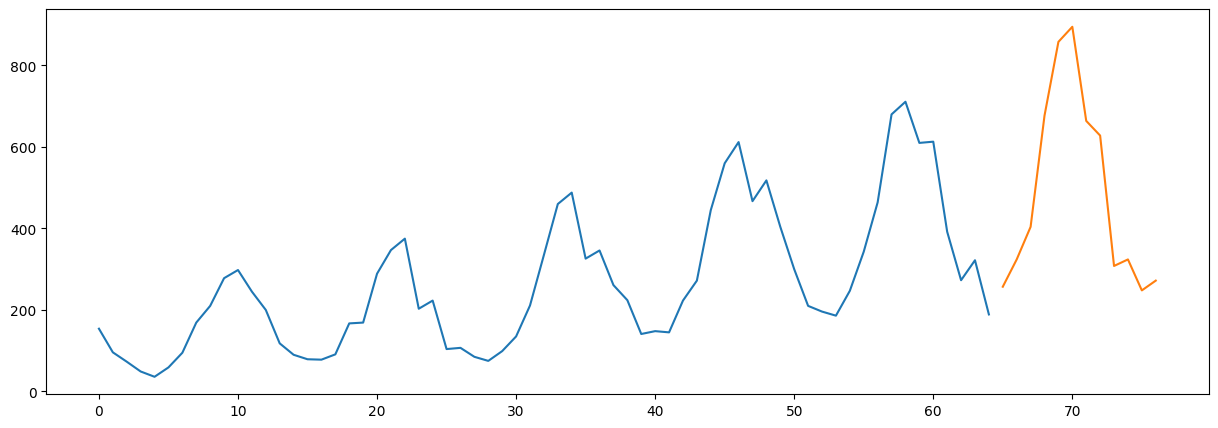

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

In [ ]:
from pmdarima.arima import auto_arima

model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,
                      d=1,
                      seasonal=False,
                      start_P=0,
                      D=None,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=749.975, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=754.036, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=748.976, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=751.389, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=752.039, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=748.435, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=748.574, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=748.615, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=746.445, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=746.980, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=746.575, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=746.624, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=747.983, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=730.084, 

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   65
Model:               SARIMAX(4, 1, 2)   Log Likelihood                -344.027
Date:                Tue, 06 Feb 2024   AIC                            704.055
Time:                        16:45:15   BIC                            721.326
Sample:                             0   HQIC                           710.859
                                 - 65                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2402      0.913      2.452      0.014       0.450       4.031
ar.L1          1.2647      0.131      9.690      0.000       1.009       1.521
ar.L2         -0.3186      0.208     -1.535      0.125      -0.725       0.088
ar.L3         -0.2333      0.213     -1.098      0.272      -0.650       0.183
ar.L4         -0.1264      0.135     -0.934      0.350      -0.392       0.139
ma.L1         -1.8734      0.181    -10.373      0.000      -2.227      -1.519
ma.L2          0.9777      0.192      5.087      0.000       0.601       1.354
sigma2      2360.8927    512.234      4.609      0.000    1356.932    3364.853
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.06
Prob(Q):                              0.94   Prob(JB):                         0.97
Heteroskedasticity (H):               5.01   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)

prediction

65    266.667607
66    353.549320
67    465.763940
68    580.941813
69    663.013807
70    695.196346
71    670.934519
72    598.528130
73    499.038196
74    400.108410
75    328.883554
76    304.925091
dtype: float64

In [ ]:
cf= pd.DataFrame(confint)

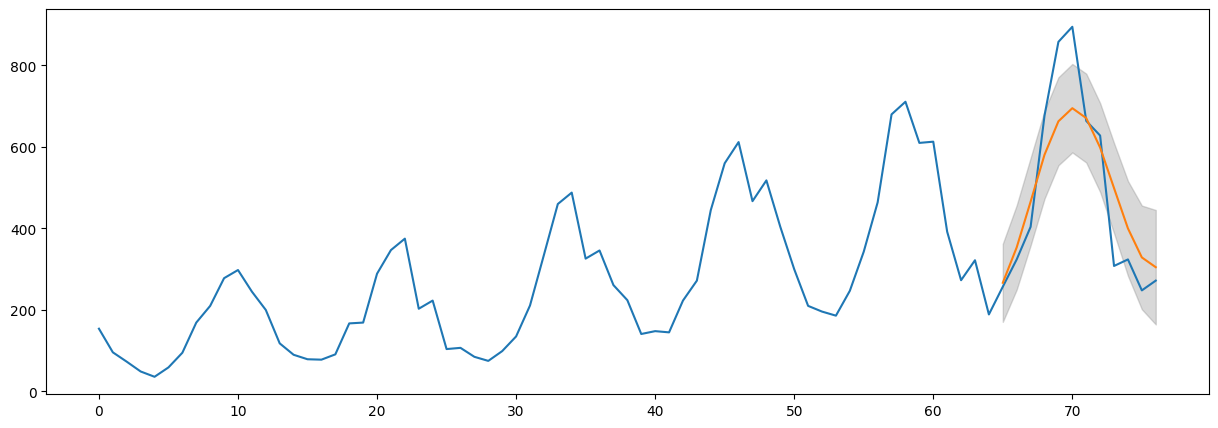

In [ ]:
prediction_series = pd.Series(prediction,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(series)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

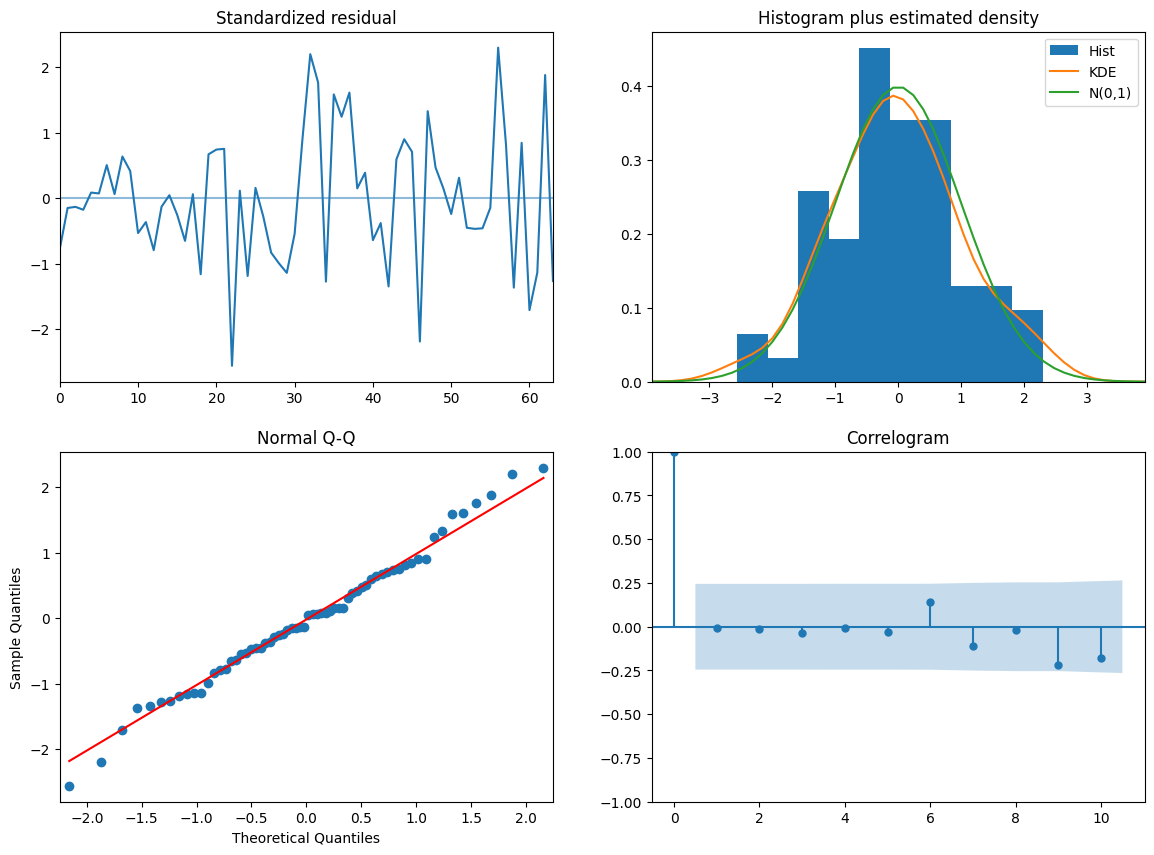

In [ ]:
model.plot_diagnostics(figsize=(14,10))
plt.show()